# Exploratory Data Analysis (EDA)
conduct EDA on the Starcraft 2 Data to examine the relationship between variables and other trends in the data.

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [2]:
starcraft_loc = '../data/interimStarcraft_cleaned.csv'
#using index_col = 0 to drop the uncessary number column added by saving the data from the previous notebook.
starcraft = pd.read_csv(starcraft_loc,index_col = 0)
starcraft.info()
starcraft.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3338 entries, 0 to 3339
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3338 non-null   int64  
 1   LeagueIndex           3338 non-null   int64  
 2   Age                   3338 non-null   int64  
 3   HoursPerWeek          3338 non-null   int64  
 4   TotalHours            3338 non-null   int64  
 5   APM                   3338 non-null   float64
 6   SelectByHotkeys       3338 non-null   float64
 7   AssignToHotkeys       3338 non-null   float64
 8   UniqueHotkeys         3338 non-null   int64  
 9   MinimapAttacks        3338 non-null   float64
 10  MinimapRightClicks    3338 non-null   float64
 11  NumberOfPACs          3338 non-null   float64
 12  GapBetweenPACs        3338 non-null   float64
 13  ActionLatency         3338 non-null   float64
 14  ActionsInPAC          3338 non-null   float64
 15  TotalMapExplored     

GameID  LeagueIndex  Age  HoursPerWeek  TotalHours       APM  \
0      52            5   27            10        3000  143.7180   
1      55            5   23            10        5000  129.2322   
2      56            4   30            10         200   69.9612   
3      57            3   19            20         400  107.6016   
4      58            3   32            10         500  122.8908   

   SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  \
0         0.003515         0.000220              7        0.000110   
1         0.003304         0.000259              4        0.000294   
2         0.001101         0.000336              4        0.000294   
3         0.001034         0.000213              1        0.000053   
4         0.001136         0.000327              2        0.000000   

   MinimapRightClicks  NumberOfPACs  GapBetweenPACs  ActionLatency  \
0            0.000392      0.004849         32.6677        40.8673   
1            0.000432      0.004307         32.9194        42.3454   
2            0.000461      0.002926         44.6475        75.3548   
3            0.000543      0.003783         29.2203        53.7352   
4            0.001329      0.002368         22.6885        62.0813   

   ActionsInPAC  TotalMapExplored  WorkersMade  UniqueUnitsMade  \
0        4.7508                28     0.001397                6   
1        4.8434                22     0.001193                5   
2        4.0430                22     0.000745                6   
3        4.9155                19     0.000426                7   
4        9.3740                15     0.001174                4   

   ComplexUnitsMade  ComplexAbilitiesUsed  
0               0.0              0.000000  
1               0.0              0.000208  
2               0.0              0.000189  
3               0.0              0.000384  
4               0.0              0.000019

# Data Story
Getting to high rank in Starcraft II is hard. So hard in fact that there is large amounts of content produced on the internet targeted towards helping you get "better" at the game. Yet "better" at the game is a pretty hard idea to quantify in a meaningful way. Given that your rank in Starcraft II is often used as a measure of your overall skill, we aren't particularly interested in some empirically "true" measure of being good at the game and are more interested in what particular game actions and habits are done more often by higher ranking players. Therefore we will be exploring the relationship between League Index and the other independant variables.

In [3]:
#Given that League Index is a categorical variable, not a continous one
#It is useful for us to find a continous variable with a high correlation to League Index for future predicitive modeling
starcraft.corr()

GameID  LeagueIndex       Age  HoursPerWeek  \
GameID                1.000000     0.024974  0.088511     -0.025322   
LeagueIndex           0.024974     1.000000 -0.127518      0.217930   
Age                   0.088511    -0.127518  1.000000     -0.184431   
HoursPerWeek         -0.025322     0.217930 -0.184431      1.000000   
TotalHours            0.004178     0.023884 -0.016630      0.024306   
APM                   0.075944     0.624171 -0.210724      0.246897   
SelectByHotkeys       0.070298     0.428637 -0.131105      0.205792   
AssignToHotkeys       0.063915     0.487280 -0.104960      0.158316   
UniqueHotkeys         0.081176     0.322415  0.015119      0.070262   
MinimapAttacks        0.022422     0.270526  0.043100      0.084103   
MinimapRightClicks    0.009898     0.206380 -0.019904      0.049498   
NumberOfPACs          0.035622     0.589193 -0.197128      0.174871   
GapBetweenPACs       -0.065629    -0.537536  0.112106     -0.133838   
ActionLatency        -0.042711    -0.659940  0.240240     -0.188735   
ActionsInPAC          0.039482     0.140303 -0.045893      0.095271   
TotalMapExplored      0.030894     0.230347 -0.024191      0.064896   
WorkersMade          -0.015191     0.310452 -0.092291      0.050679   
UniqueUnitsMade       0.029487     0.151933  0.022893      0.038524   
ComplexUnitsMade     -0.018056     0.171190 -0.080269      0.059285   
ComplexAbilitiesUsed  0.004051     0.156033 -0.065603      0.074713   

                      TotalHours       APM  SelectByHotkeys  AssignToHotkeys  \
GameID                  0.004178  0.075944         0.070298         0.063915   
LeagueIndex             0.023884  0.624171         0.428637         0.487280   
Age                    -0.016630 -0.210724        -0.131105        -0.104960   
HoursPerWeek            0.024306  0.246897         0.205792         0.158316   
TotalHours              1.000000  0.072850         0.081830         0.042415   
APM                     0.072850  1.000000         0.814624         0.534134   
SelectByHotkeys         0.081830  0.814624         1.000000         0.450342   
AssignToHotkeys         0.042415  0.534134         0.450342         1.000000   
UniqueHotkeys           0.009318  0.335986         0.274030         0.402555   
MinimapAttacks          0.000869  0.218562         0.132723         0.205436   
MinimapRightClicks      0.007662  0.306392         0.107615         0.154998   
NumberOfPACs            0.039577  0.635248         0.360057         0.454480   
GapBetweenPACs         -0.020644 -0.567396        -0.273767        -0.377926   
ActionLatency          -0.035700 -0.722253        -0.390012        -0.461496   
ActionsInPAC            0.010704  0.402928         0.166964         0.091508   
TotalMapExplored        0.020486  0.239336         0.097397         0.201862   
WorkersMade             0.014828  0.377719         0.161404         0.197011   
UniqueUnitsMade        -0.002379  0.122916         0.027628         0.149329   
ComplexUnitsMade       -0.007154  0.161774         0.065467         0.169849   
ComplexAbilitiesUsed   -0.006311  0.141060         0.063720         0.169048   

                      UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
GameID                     0.081176        0.022422            0.009898   
LeagueIndex                0.322415        0.270526            0.206380   
Age                        0.015119        0.043100           -0.019904   
HoursPerWeek               0.070262        0.084103            0.049498   
TotalHours                 0.009318        0.000869            0.007662   
APM                        0.335986        0.218562            0.306392   
SelectByHotkeys            0.274030        0.132723            0.107615   
AssignToHotkeys            0.402555        0.205436            0.154998   
UniqueHotkeys              1.000000        0.151029            0.124570   
MinimapAttacks             0.151029        1.000000            0.224683   
MinimapRightClicks        

<AxesSubplot:>

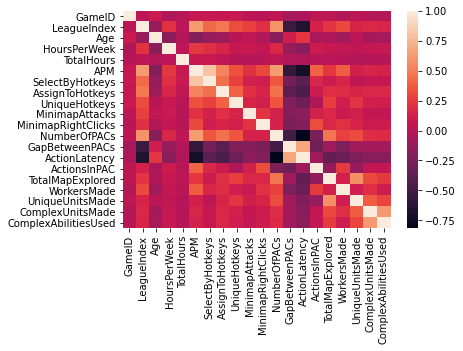

In [4]:
sns.heatmap(data=starcraft.corr())

At first glance, it appears that APM (actions per minute) and NumberOfPACs seem to be highly positively correlated to league index while ActionLatency and GapBetweenPACs seem to be highly negatively correlated. It may be interesting to plot these values with each other. A PAC is simply a way of measureing a shift in focus. In this case a single PAC is counted when the screen is shifted to a new area for a minimum amount of time and at least one action is performed.

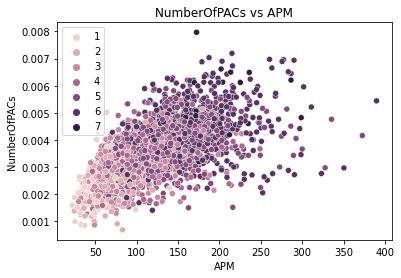

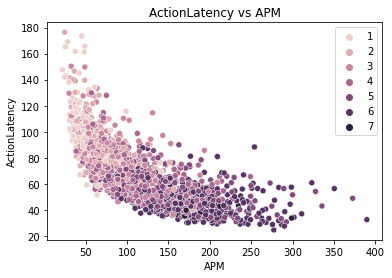

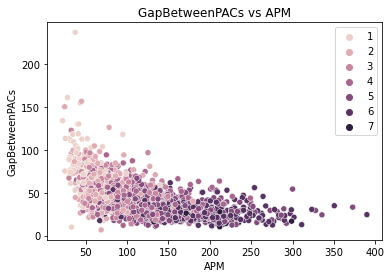

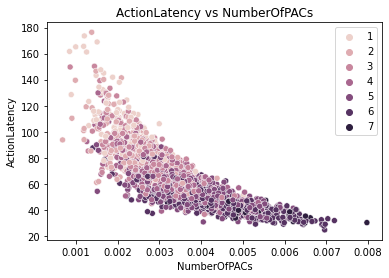

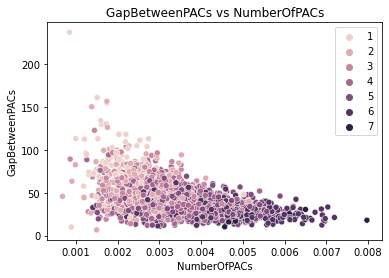

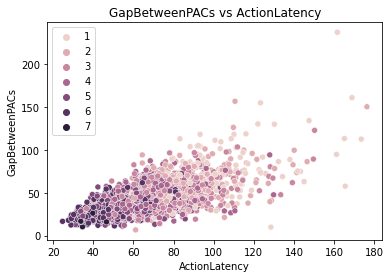

In [5]:
colsOfInterest = ['APM','NumberOfPACs','ActionLatency','GapBetweenPACs']
for i in range(len(colsOfInterest)):
    for j in colsOfInterest[i+1:]:
        _ = sns.scatterplot(x=colsOfInterest[i],y=j,data=starcraft,hue='LeagueIndex')
        _ = plt.legend()
        _ = plt.xlabel(colsOfInterest[i])
        _ = plt.ylabel(j)
        _ = plt.title(j+ ' vs ' +colsOfInterest[i])
        plt.show()

We find that Number of PACs and APM seem to have similar relationships with our other, negative predictors and that our correlation assesment from the above heatmap and table seems to hold true. Given that we have more information about PACs, for example information about the number of actions within a PAC in a given game, of the two high correlation predictors of league it makes the most sense to use NumberOfPACs as our continous variable when moving forward. Lets continue to explore how other factors may effect the number of PACs.

In [6]:
#We look at age and hours per week compared to Number of PACs
#We want to categorize data into low high numbers of hours per week so first we find summary statistics for the hour column
starcraft['HoursPerWeek'].describe()

count    3338.000000
mean       15.909527
std        11.964495
min         0.000000
25%         8.000000
50%        12.000000
75%        20.000000
max       168.000000
Name: HoursPerWeek, dtype: float64

In [7]:
#We are going to choose to split our hours around the median, so as to reduce the effect of outliers
starcraft['HoursType']=starcraft['HoursPerWeek'].apply(lambda x: 'High' if x>12.0 else 'Low')
starcraft.head()

GameID  LeagueIndex  Age  HoursPerWeek  TotalHours       APM  \
0      52            5   27            10        3000  143.7180   
1      55            5   23            10        5000  129.2322   
2      56            4   30            10         200   69.9612   
3      57            3   19            20         400  107.6016   
4      58            3   32            10         500  122.8908   

   SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  ...  \
0         0.003515         0.000220              7        0.000110  ...   
1         0.003304         0.000259              4        0.000294  ...   
2         0.001101         0.000336              4        0.000294  ...   
3         0.001034         0.000213              1        0.000053  ...   
4         0.001136         0.000327              2        0.000000  ...   

   NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0      0.004849         32.6677        40.8673        4.7508   
1      0.004307         32.9194        42.3454        4.8434   
2      0.002926         44.6475        75.3548        4.0430   
3      0.003783         29.2203        53.7352        4.9155   
4      0.002368         22.6885        62.0813        9.3740   

   TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0                28     0.001397                6               0.0   
1                22     0.001193                5               0.0   
2                22     0.000745                6               0.0   
3                19     0.000426                7               0.0   
4                15     0.001174                4               0.0   

   ComplexAbilitiesUsed  HoursType  
0              0.000000        Low  
1              0.000208        Low  
2              0.000189        Low  
3              0.000384       High  
4              0.000019        Low  

[5 rows x 21 columns]

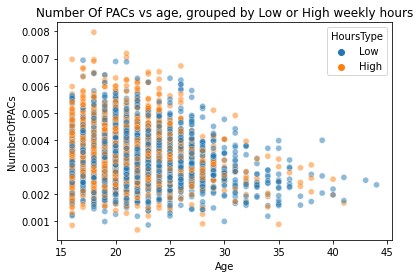

In [8]:
_ = sns.scatterplot(y='NumberOfPACs',x='Age',hue='HoursType',data=starcraft,alpha=.5)
_ = plt.title('Number Of PACs vs age, grouped by Low or High weekly hours')
plt.show()

Given that yellow and blue dots are dispersed relatively evenly it doesn't seem as if hours per week has a huge impact on number of PACs. We do notice a relatively steep drop off in number of PACs after about 25 years of age. This is worth keeping an eye on, lets check to see if this is a meaningful factor or if it is mostly impacted by the number of responses we have from younger players.

In [9]:
#Get summary statistics for age
starcraft['Age'].describe()

count    3338.000000
mean       21.650389
std         4.206357
min        16.000000
25%        19.000000
50%        21.000000
75%        24.000000
max        44.000000
Name: Age, dtype: float64

In [10]:
#check the summary statistics for number of PACs for players above our 75%
old_craft = starcraft[starcraft['Age'] > 24]
old_craft['NumberOfPACs'].describe()

count    699.000000
mean       0.003073
std        0.000899
min        0.000887
25%        0.002460
50%        0.002978
75%        0.003608
max        0.006728
Name: NumberOfPACs, dtype: float64

In [11]:
#compare to number of PACs summary stats of the whole data set
starcraft['NumberOfPACs'].describe()

count    3338.000000
mean        0.003433
std         0.000966
min         0.000679
25%         0.002743
50%         0.003376
75%         0.004003
max         0.007971
Name: NumberOfPACs, dtype: float64

We do find that while hours per week don't appear to have a consistent impact on number of PACs, as players become 25 years or older they do seem to have a reduced number of PACs.

Lets explore how hotkey management might effect our Number of PACs stat. We have 3 hotkey related columns. We will also color by age to see if we continue to find a difference in age.

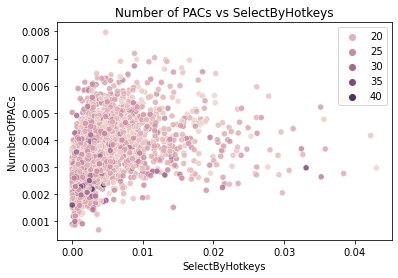

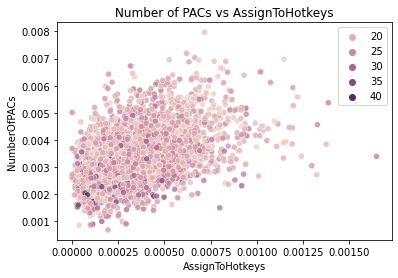

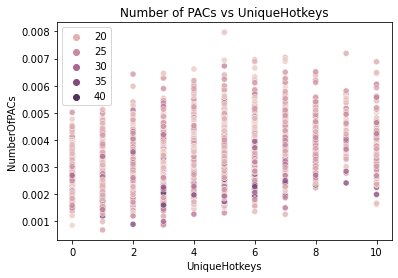

In [12]:
hotkey_vars = ['SelectByHotkeys','AssignToHotkeys','UniqueHotkeys']
for i in hotkey_vars:
    _ = sns.scatterplot(x=i,y='NumberOfPACs',data=starcraft,hue='Age',alpha=.8)
    _ = plt.legend()
    _ = plt.title('Number of PACs vs ' + i)
    plt.show()

In these figures, it does not appear as if age is a meaningful contributor, though we do see that they all have a slight positive relationship to PACs, AssignToHotkeys has the most noteable positive relationship.

So far, we have found that Number of PACs appears to be a good predictor of League Index, and that APM has the largest positive correlation on Number of PACS followed by Assign To Hotkeys while Action Latency seemed to have the greatest negative impact on Number of PACs. Finally we will check these variables effects on League Index to confirm that Number of PACs is a good continous variable substitute for our categorical variable of interest in League Index.

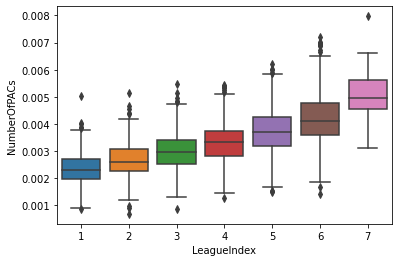

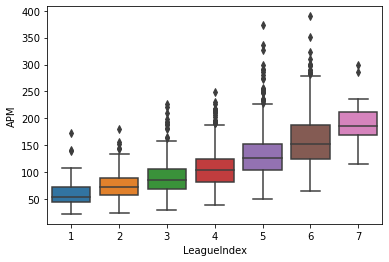

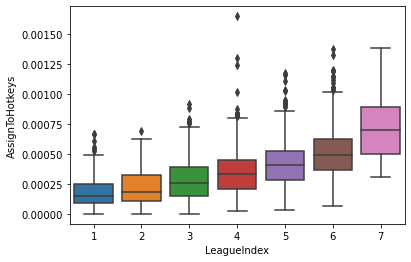

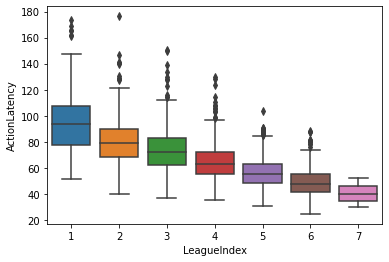

In [13]:
_ = sns.boxplot(y='NumberOfPACs',x='LeagueIndex',data=starcraft)
plt.show()
_ = sns.boxplot(y='APM',x='LeagueIndex',data=starcraft)
plt.show()
_ = sns.boxplot(y='AssignToHotkeys',x='LeagueIndex',data=starcraft)
plt.show()
_ = sns.boxplot(y='ActionLatency',x='LeagueIndex',data=starcraft)
plt.show()

The above figures confirm what we suspected, those stats that have a meaningful impact on Number of PACs also have a similar impact on Leage Index. This seems to suggest that to increase in league rating, a player should be taking more actions and moving their camera around the map more frequently and assigning more units to hotkeys. However these gaps in stats appear to get more extreme beyond League Index 4, lets subset our data and see if there are higher correlations for other categories at lower ranks.

In [14]:
bad_craft = starcraft[starcraft['LeagueIndex'] <= 4]
bad_craft.shape

(1878, 21)

GameID  LeagueIndex       Age  HoursPerWeek  \
GameID                1.000000     0.023818  0.093573     -0.000984   
LeagueIndex           0.023818     1.000000 -0.037418      0.031854   
Age                   0.093573    -0.037418  1.000000     -0.161764   
HoursPerWeek         -0.000984     0.031854 -0.161764      1.000000   
TotalHours            0.050255     0.183479  0.015712      0.205136   
APM                   0.094666     0.448172 -0.186890      0.128360   
SelectByHotkeys       0.079922     0.261856 -0.074742      0.088290   
AssignToHotkeys       0.067922     0.307648 -0.021732     -0.000798   
UniqueHotkeys         0.093425     0.121897  0.063830     -0.023947   
MinimapAttacks        0.034055     0.150455  0.101519     -0.027056   
MinimapRightClicks    0.019137     0.152772 -0.024673      0.004491   
NumberOfPACs          0.065448     0.419593 -0.165117      0.048931   
GapBetweenPACs       -0.071028    -0.392613  0.067049     -0.049605   
ActionLatency        -0.048347    -0.487949  0.214300     -0.084943   
ActionsInPAC          0.035742     0.115045 -0.067948      0.094802   
TotalMapExplored      0.059929     0.153599  0.015245     -0.020962   
WorkersMade           0.035639     0.252422 -0.077488      0.005220   
UniqueUnitsMade       0.068836     0.136268  0.054811     -0.020091   
ComplexUnitsMade      0.005774     0.178580 -0.087596      0.031740   
ComplexAbilitiesUsed  0.036998     0.133054 -0.081190      0.031918   

                      TotalHours       APM  SelectByHotkeys  AssignToHotkeys  \
GameID                  0.050255  0.094666         0.079922         0.067922   
LeagueIndex             0.183479  0.448172         0.261856         0.307648   
Age                     0.015712 -0.186890        -0.074742        -0.021732   
HoursPerWeek            0.205136  0.128360         0.088290        -0.000798   
TotalHours              1.000000  0.167701         0.134512         0.030611   
APM                     0.167701  1.000000         0.705788         0.402795   
SelectByHotkeys         0.134512  0.705788         1.000000         0.403655   
AssignToHotkeys         0.030611  0.402795         0.403655         1.000000   
UniqueHotkeys          -0.019894  0.191568         0.194995         0.297146   
MinimapAttacks          0.041343  0.139104         0.079701         0.095550   
MinimapRightClicks      0.055155  0.313510         0.090824         0.085166   
NumberOfPACs            0.086273  0.579136         0.297902         0.325071   
GapBetweenPACs         -0.092874 -0.516629        -0.168946        -0.267722   
ActionLatency          -0.117731 -0.690200        -0.297269        -0.322714   
ActionsInPAC            0.081954  0.484527         0.128271         0.050175   
TotalMapExplored        0.038781  0.231867         0.099709         0.111885   
WorkersMade             0.033428  0.415245         0.182283         0.147181   
UniqueUnitsMade         0.046240  0.131286         0.045724         0.118114   
ComplexUnitsMade        0.055720  0.212798         0.087348         0.144131   
ComplexAbilitiesUsed    0.062179  0.154673         0.055102         0.111234   

                      UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
GameID                     0.093425        0.034055            0.019137   
LeagueIndex                0.121897        0.150455            0.152772   
Age                        0.063830        0.101519           -0.024673   
HoursPerWeek              -0.023947       -0.027056            0.004491   
TotalHours                -0.019894        0.041343            0.055155   
APM                        0.191568        0.139104            0.313510   
SelectByHotkeys            0.194995        0.079701            0.090824   
AssignToHotkeys            0.297146        0.095550            0.085166   
UniqueHotkeys              1.000000        0.065508            0.045986   
MinimapAttacks             0.065508        1.000000            0.208630   
MinimapRightClicks        

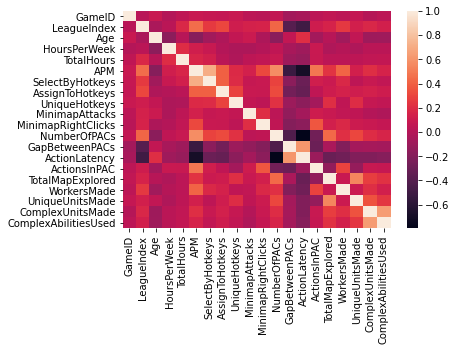

In [15]:
sns.heatmap(data=bad_craft.corr())
bad_craft.corr()

We can see that in general our correlations have moved towards 0, this is expected as we have less variation in league index. Due to this expected decrease, any categories with correlation numbers that increased are worth exploring deeper. In this case, total hours and complex units made. We will plot them as bar plots across all 7 league indexes below.

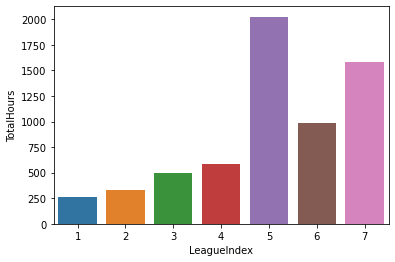

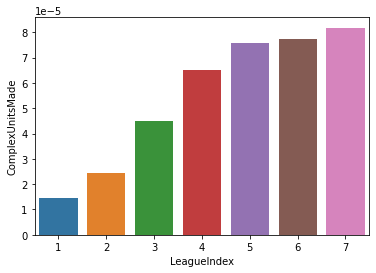

In [16]:
_ = sns.barplot(y='TotalHours',x='LeagueIndex',data=starcraft,ci=None)
plt.show()
_ = sns.barplot(y='ComplexUnitsMade',x='LeagueIndex',data=starcraft,ci=None)
plt.show()

We can clearly see that in the lower leagues, total hours and number of complex units made have a much larger impact on rank increase than they do at a higher rank where the bars start to step up in less extreme fashions or even, in the case of total hours, step down. This suggests that early on in your Starcraft league ranking up journey, it may be more meaningful to gain experience and focus on strategic decisions, such as what units to make, but that later at higher ranks getting better can often amount to getting faster.